interactive(children=(Dropdown(description='Function', options=('Linear', 'Exponential', 'Sine', 'Sigmoid'), v…

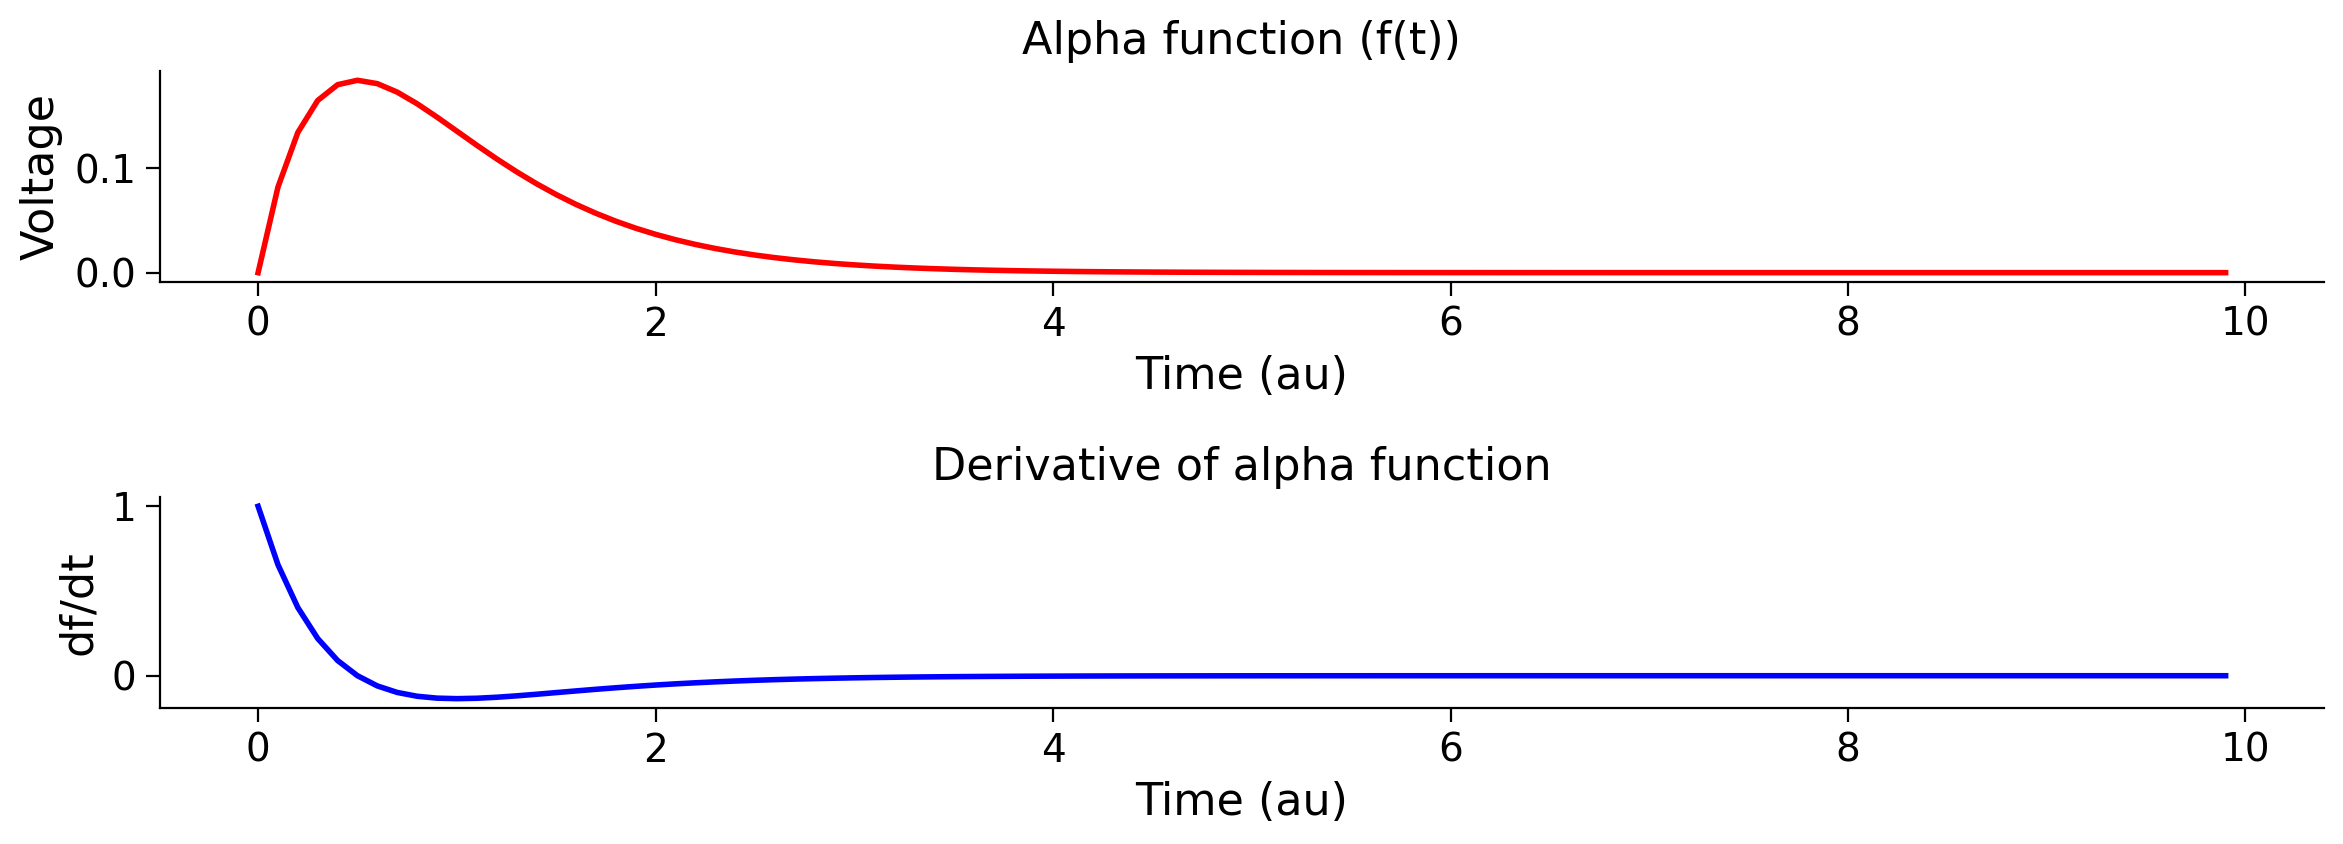

In [ ]:
# Imports
import numpy as np
import scipy.optimize as opt  # import root-finding algorithm
import sympy as sp  # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d  # Toolbox for rendring 3D figures

# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

fig_w, fig_h = 12, 4.5
my_fontsize = 16
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': [fig_w, fig_h],
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)

# @title Plotting Functions
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)


def plot_functions(function, show_derivative, show_integral):

  # For sympy we first define our symbolic variable
  x, y, z, t, f = sp.symbols('x y z t f')

  # We define our function
  if function == 'Linear':
    f = -2*t
    name = r'$-2t$'
  elif function == 'Parabolic':
    f =  t**2
    name = r'$t^2$'
  elif function == 'Exponential':
    f =  sp.exp(t)
    name = r'$e^t$'
  elif function == 'Sine':
    f =  sp.sin(t)
    name = r'$sin(t)$'
  elif function == 'Sigmoid':
    f = 1/(1 + sp.exp(-(t-5)))
    name = r'$\frac{1}{1+e^{-(t-5)}}$'

  if show_derivative and not show_integral:
    # Calculate the derivative of sin(t) as a function of t
    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    p1 = sp.plot(f, diff_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()
  elif show_integral and not show_derivative:

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)


    p1 = sp.plot(f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='g'
    p1[0].label='Function'
    p1[1].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


  elif show_integral and show_derivative:

    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)

    p1 = sp.plot(f, diff_f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[2].line_color='g'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1[2].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()

  else:

    p1 = sp.plot(f, show=False)
    p1[0].line_color='r'
    p1[0].label='Function'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


def plot_alpha_func(t, f, df_dt):

  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(t, f, 'r', label='Alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('Voltage')
  plt.title('Alpha function (f(t))')
  #plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t, df_dt, 'b', label='Derivative')
  plt.title('Derivative of alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('df/dt')
  #plt.legend()


def plot_charge_transfer(t, PSP, numerical_integral):

  fig, axes = plt.subplots(1, 2)

  axes[0].plot(t, PSP)
  axes[0].set(xlabel = 't', ylabel = 'PSP')

  axes[1].plot(t, numerical_integral)
  axes[1].set(xlabel = 't', ylabel = 'Charge Transferred')

  # @markdown Execute this cell to enable the widget
function_options = widgets.Dropdown(
    options=['Linear', 'Exponential', 'Sine', 'Sigmoid'],
    description='Function',
    disabled=False,
)

derivative = widgets.Checkbox(
    value=False,
    description='Show derivative',
    disabled=False,
    indent=False
)

integral = widgets.Checkbox(
    value=False,
    description='Show integral',
    disabled=False,
    indent=False
)

def on_value_change(change):
    derivative.value = False
    integral.value = False

function_options.observe(on_value_change, names='value')

interact(plot_functions, function = function_options, show_derivative = derivative, show_integral = integral);

# Define time, time constant
t = np.arange(0, 10, .1)
tau = 0.5

# Compute alpha function
f = t * np.exp(-t/tau)

# Define u(t), v(t)
u_t = t
v_t = np.exp(-t/tau)

# Define du/dt, dv/dt
du_dt = 1
dv_dt = -1/tau * np.exp(-t/tau)

# Define full derivative
df_dt = u_t * dv_dt + v_t * du_dt


# Visualize
plot_alpha_func(t, f, df_dt)

In [ ]:
# @markdown *Execute this cell to enable the widget.*
def numerical_derivative_demo(h = 0.2):
  # Now lets create a sequence of numbers which change according to the sine function
  dt = 0.01
  tx = np.arange(-10, 10, dt)
  sine_fun = np.sin(tx)

  # symbolic diffrentiation tells us that the derivative of sin(t) is cos(t)
  cos_fun = np.cos(tx)

  # Numerical derivative using difference formula
  n_tx = np.arange(-10,10,h) # create new time axis
  n_sine_fun = np.sin(n_tx) # calculate the sine function on the new time axis
  sine_diff = (n_sine_fun[1:] - n_sine_fun[0:-1]) / h

  fig = plt.figure()
  ax = plt.subplot(111)
  plt.plot(tx, sine_fun, label='sine function')
  plt.plot(tx, cos_fun, label='analytical derivative of sine')

  with plt.xkcd():
    # notice that numerical derivative will have one element less
    plt.plot(n_tx[0:-1], sine_diff, label='numerical derivative of sine')
    plt.xlim([-10, 10])
    plt.xlabel('Time (au)')
    plt.ylabel('f(x) or df(x)/dt')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
              ncol=3, fancybox=True)
    plt.show()

_ = widgets.interact(numerical_derivative_demo, h = (0.01, 0.5, .02))



interactive(children=(FloatSlider(value=0.2, description='h', max=0.5, min=0.01, step=0.02), Output()), _dom_c…

In [ ]:
!pip install pyngrock

ERROR: Could not find a version that satisfies the requirement pyngrock (from versions: none)
ERROR: No matching distribution found for pyngrock


interactive(children=(FloatSlider(value=1.24, description='a', max=2.0, min=0.5, step=0.02), FloatSlider(value…

NameError: ignored

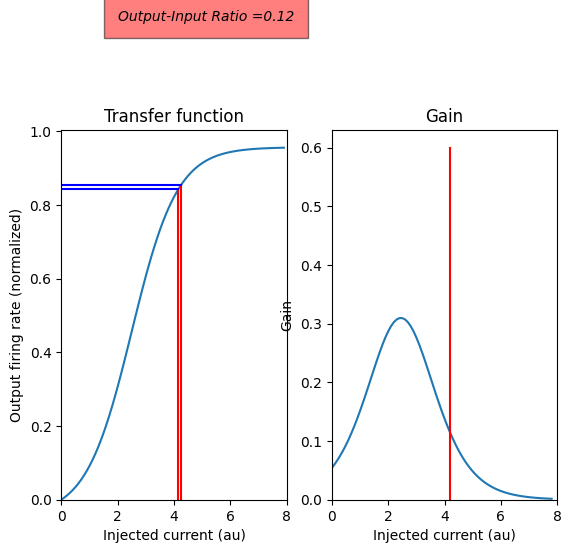

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sympy as sp


def compute_rate_and_gain(I, a, theta, current_timestep):
  """ Compute rate and gain of neuron based on parameters

  Args:
    I (ndarray): different possible values of the current
    a (scalar): parameter of the transfer function
    theta (scalar): parameter of the transfer function
    current_timestep (scalar): the time we're using to take steps

  Returns:
    (ndarray, ndarray): rate and gain for each possible value of I
  """

  # Compute rate
  rate = (1+np.exp(-a*(I-theta)))**-1 - (1+np.exp(a*theta))**-1

  # Compute gain using a numerical derivative
  gain = (rate[1:] - rate[0:-1])/current_timestep

  return rate, gain

# @markdown Execute this cell to enable the widget

def plot_rate_and_gain(a, theta, I_mean):

  current_timestep = 0.1

  # Compute I
  I = np.arange(0, 8, current_timestep)

  rate, gain = compute_rate_and_gain(I, a, theta, current_timestep)
  I_1 = I_mean - current_timestep/2
  rate_1 = (1+np.exp(-a*(I_1-theta)))**-1 - (1+np.exp(a*theta))**-1
  I_2 = I_mean + current_timestep/2
  rate_2 = (1+np.exp(-a*(I_2-theta)))**-1 - (1+np.exp(a*theta))**-1

  input_range = I_2-I_1
  output_range = rate_2 - rate_1

  # Visualize rate and gain
  plt.subplot(1,2,1)
  plt.plot(I,rate)
  plt.plot([I_1,I_1],[0, rate_1],color='r')
  plt.plot([0,I_1],[rate_1, rate_1],color='b')
  plt.plot([I_2,I_2],[0, rate_2],color='r')
  plt.plot([0,I_2],[rate_2, rate_2],color='b')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])

  plt.xlabel('Injected current (au)')
  plt.ylabel('Output firing rate (normalized)')
  plt.title('Transfer function')

  plt.text(2, 1.3, 'Output-Input Ratio =' + str(np.round(1000*output_range/input_range)/1000), style='italic',
      bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
  plt.subplot(1,2,2)
  plt.plot(I[0:-1], gain)
  plt.plot([I_mean, I_mean],[0,0.6],color='r')
  plt.xlabel('Injected current (au)')
  plt.ylabel('Gain')
  plt.title('Gain')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])


_ = widgets.interact(plot_rate_and_gain, a = (0.5, 2.0, .02), theta=(1.2,4.0,0.1), I_mean= (0.5,8.0,0.1))

# @markdown Execute this widget to enable the demo

# Let's use sympy to calculate Partial derivatives of a function of 2-variables
@interact(f2d_string = 'x**2 + 2*x*y + y**2')
def plot_partial_derivs(f2d_string):
  f, x, y = sp.symbols('f, x, y')

  f2d = eval(f2d_string)
  f2d_dx = sp.diff(f2d,x)
  f2d_dy = sp.diff(f2d,y)

  print('Partial derivative of ', f2d, 'with respect to x is', f2d_dx)
  print('Partial derivative of ', f2d, 'with respect to y is', f2d_dy)

  p1 = sp.plotting.plot3d(f2d, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='f(x,y)',title='Our function')

  p2 = sp.plotting.plot3d(f2d_dx, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dx',title='Derivative w.r.t. x')

  p3 = sp.plotting.plot3d(f2d_dy, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dy',title='Derivative w.r.t. y')

In [ ]:
# @markdown Run this cell to enable the widget!
def riemann_sum_demo(dt = 0.5):
  step_size = 0.1
  min_val = 0.
  max_val = 10.
  tx = np.arange(min_val, max_val, step_size)

  # Our function
  ftn = tx**2 - tx + 1
  # And the integral analytical formula calculates using sympy
  int_ftn = tx**3/3 - tx**2/2 + tx

  # Numerical integration of f(t) using Riemann Sum
  n = int((max_val-min_val)/dt)
  r_tx = np.zeros(n)
  fun_value = np.zeros(n)
  for ii in range(n):
    a = min_val+ii*dt
    fun_value[ii] = a**2 - a + 1
    r_tx[ii] = a;

  # Riemann sum is just cumulative sum of the fun_value multiplied by the
  r_sum = np.cumsum(fun_value)*dt
  with plt.xkcd():
    plt.figure(figsize=(20,5))
    ax = plt.subplot(1,2,1)
    plt.plot(tx,ftn,label='Function')

    for ii in range(n):
      plt.plot([r_tx[ii], r_tx[ii], r_tx[ii]+dt, r_tx[ii]+dt], [0, fun_value[ii], fun_value[ii], 0] ,color='r')

    plt.xlabel('Time (au)')
    plt.ylabel('f(t)')
    plt.title('f(t)')
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(tx,int_ftn,label='Analytical')
    plt.plot(r_tx+dt,r_sum,color = 'r',label='Riemann Sum')
    plt.xlabel('Time (au)')
    plt.ylabel('int(f(t))')
    plt.title('Integral of f(t)')
    plt.grid()
    plt.legend()
    plt.show()


_ = widgets.interact(riemann_sum_demo, dt = (0.1, 1., .02))



interactive(children=(FloatSlider(value=0.5, description='dt', max=1.0, min=0.1, step=0.02), Output()), _dom_c…

In [ ]:
# Set up parameters
J = 1
tau_s = 1
t_sp = 1
dt = .1
t = np.arange(0, 10, dt)

# Code PSP formula
PSP = J*t*np.exp(-(t-t_sp)/tau_s)

# Compute numerical integral
# We already have PSP at every time step (height of rectangles). We need to
#.  multiply by width of rectangles (dt) to get areas
rectangle_areas = PSP* dt

# Cumulatively sum rectangles (hint: use np.cumsum)
numerical_integral = np.cumsum(rectangle_areas)

# Visualize
plot_charge_transfer(t, PSP, numerical_integral)



NameError: ignored

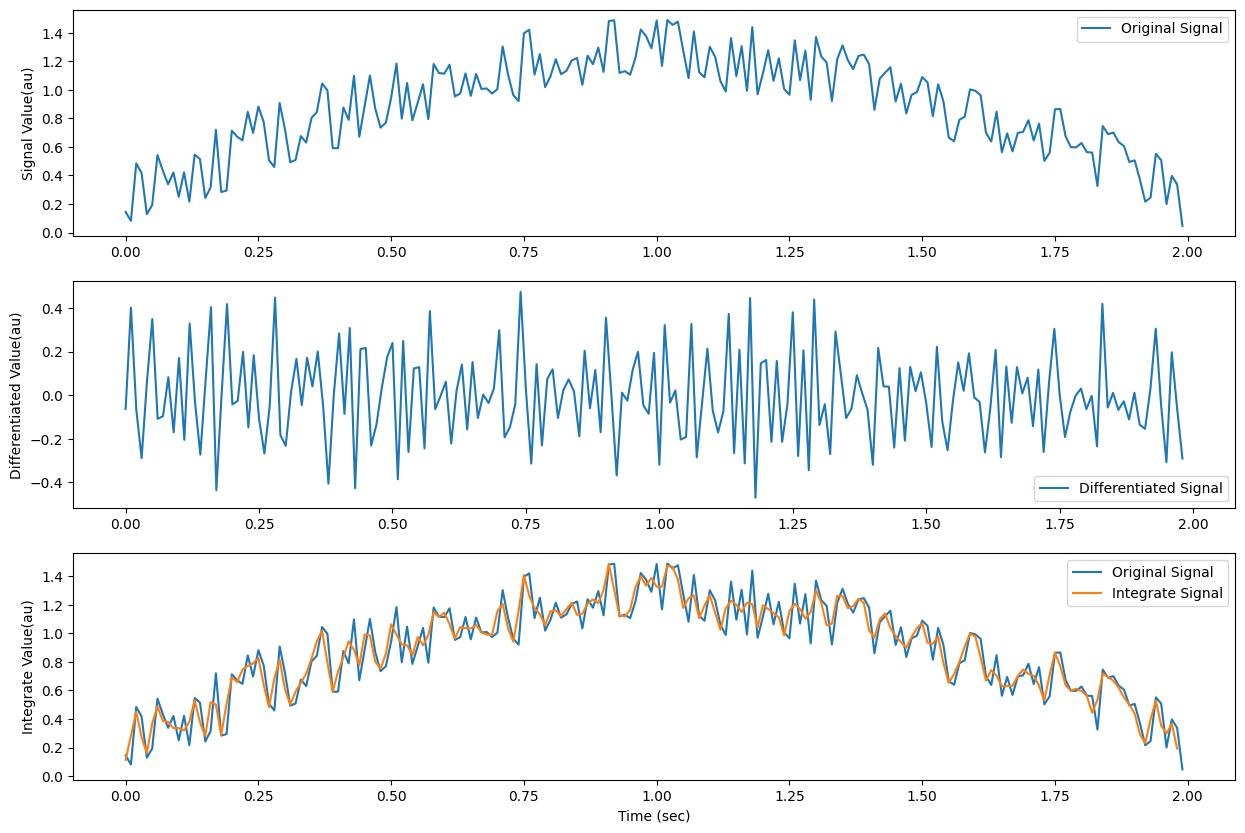

In [ ]:
# @markdown Execute this cell to see visualization
h = 0.01
tx = np.arange(0,2,h)
noise_signal = np.random.uniform(0, 1, (len(tx)))*0.5
x1 = np.sin(0.5*np.pi*tx) + noise_signal # This will generate a 1 Hz sin wave
# In the signal x1 we have added random noise which contributs the high frequencies

# Take the derivative equivalent of the signal i.e. subtract the adjacent values
x1_diff = (x1[1:] - x1[:-1])

# Take the integration equivalent of the signal i.e. sum the adjacent values. And divide by 2 (take average essentially)
x1_integrate = (x1[1:] + x1[:-1])/2

# Plotting code
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(tx,x1,label='Original Signal')
#plt.xlabel('Time (sec)')
plt.ylabel('Signal Value(au)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(tx[0:-1],x1_diff,label='Differentiated Signal')
# plt.xlabel('Time (sec)')
plt.ylabel('Differentiated Value(au)')
plt.legend()

plt.subplot(3,1,3)
plt.plot(tx,x1,label='Original Signal')
plt.plot(tx[0:-1],x1_integrate,label='Integrate Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Integrate Value(au)')
plt.legend()

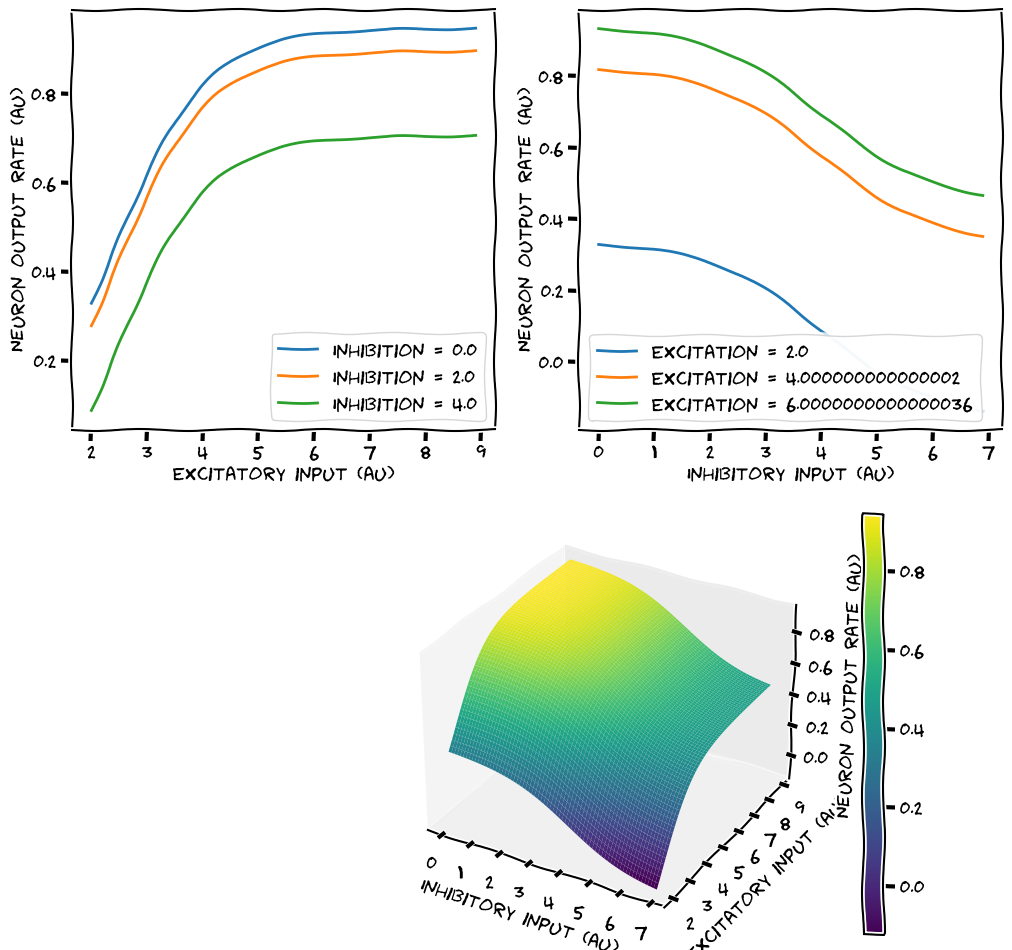

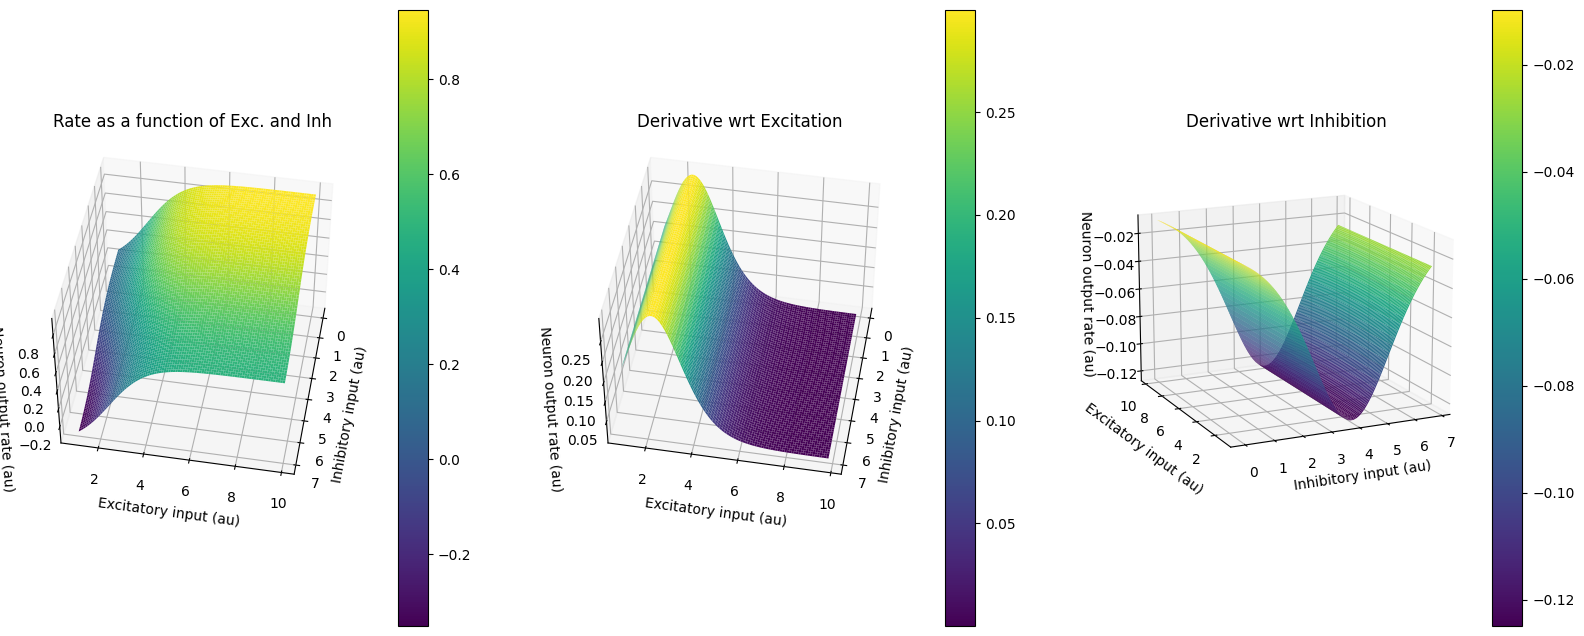

In [6]:
import numpy as np
import scipy.optimize as opt  # import root-finding algorithm
import sympy as sp  # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d  # Toolbox for rendring 3D figures
def sigmoid_function(x,a,theta):
    '''
    Population activation function.

    Expects:
    x     : the population input
    a     : the gain of the function
    theta : the threshold of the function

    Returns:
    the population activation response F(x) for input x
    '''
    # add the expression of f = F(x)
    f = (1+np.exp(-a*(x-theta)))**-1 - (1+np.exp(a*theta))**-1

    return f

# Neuron Transfer function
step_size = 0.1
exc_input = np.arange(2,9,step_size)
inh_input = np.arange(0,7,step_size)
exc_a = 1.2
exc_theta = 2.4
inh_a = 1.
inh_theta = 4.

rate = np.zeros((len(exc_input),len(inh_input)))

for ii in range(len(exc_input)):
  for jj in range(len(inh_input)):
    rate[ii,jj] = sigmoid_function(exc_input[ii],exc_a,exc_theta) - sigmoid_function(inh_input[jj],inh_a,inh_theta)*0.5

with plt.xkcd():
  X, Y = np.meshgrid(exc_input, inh_input)
  fig = plt.figure(figsize=(12,12))
  ax1 = fig.add_subplot(2,2,1)
  lg_txt = 'Inhibition = ' + str(inh_input[0])
  ax1.plot(exc_input,rate[:,0],label=lg_txt)
  lg_txt = 'Inhibition = ' + str(inh_input[20])
  ax1.plot(exc_input,rate[:,20],label=lg_txt)
  lg_txt = 'Inhibition = ' + str(inh_input[40])
  ax1.plot(exc_input,rate[:,40],label=lg_txt)
  ax1.legend()
  ax1.set_xlabel('Excitatory input (au)')
  ax1.set_ylabel('Neuron output rate (au)');

  ax2 = fig.add_subplot(2,2,2)
  lg_txt = 'Excitation = ' + str(exc_input[0])
  ax2.plot(inh_input,rate[0,:],label=lg_txt)
  lg_txt = 'Excitation = ' + str(exc_input[20])
  ax2.plot(inh_input,rate[20,:],label=lg_txt)
  lg_txt = 'Excitation = ' + str(exc_input[40])
  ax2.plot(inh_input,rate[40,:],label=lg_txt)
  ax2.legend()
  ax2.set_xlabel('Inhibitory input (au)')
  ax2.set_ylabel('Neuron output rate (au)');

  ax3 = fig.add_subplot(2, 1, 2, projection='3d')
  surf= ax3.plot_surface(Y.T, X.T, rate, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
  ax3.set_xlabel('Inhibitory input (au)')
  ax3.set_ylabel('Excitatory input (au)')
  ax3.set_zlabel('Neuron output rate (au)');
  fig.colorbar(surf)
# @markdown Execute this cell implement our neural transfer function, `plot_2d_neuron_transfer_function`, in respond to excitatory and inhibitory in
def plot_2d_neuron_transfer_function(exc_a, exc_theta, inh_a, inh_theta):
    # Neuron Transfer Function
    step_size = 0.1
    exc_input = np.arange(1,10,step_size)
    inh_input = np.arange(0,7,step_size)

    rate = np.zeros((len(exc_input),len(inh_input)))
    for ii in range(len(exc_input)):
      for jj in range(len(inh_input)):
        rate[ii,jj] = sigmoid_function(exc_input[ii],exc_a,exc_theta) - sigmoid_function(inh_input[jj],inh_a,inh_theta)*0.5

    # Derivative with respect to excitatory input rate
    rate_de = np.zeros((len(exc_input)-1,len(inh_input)))# this will have one row less than the rate matrix
    for ii in range(len(inh_input)):
      rate_de[:,ii] = (rate[1:,ii] - rate[0:-1,ii])/step_size

    # Derivative with respect to inhibitory input rate
    rate_di = np.zeros((len(exc_input),len(inh_input)-1))# this will have one column less than the rate matrix
    for ii in range(len(exc_input)):
      rate_di[ii,:] = (rate[ii,1:] - rate[ii,0:-1])/step_size


    X, Y = np.meshgrid(exc_input, inh_input)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    surf1 = ax1.plot_surface(Y.T, X.T, rate, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('Inhibitory input (au)')
    ax1.set_ylabel('Excitatory input (au)')
    ax1.set_zlabel('Neuron output rate (au)')
    ax1.set_title('Rate as a function of Exc. and Inh');
    ax1.view_init(45, 10)
    fig.colorbar(surf1)

    Xde, Yde = np.meshgrid(exc_input[0:-1], inh_input)
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    surf2 = ax2.plot_surface(Yde.T, Xde.T, rate_de, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax2.set_xlabel('Inhibitory input (au)')
    ax2.set_ylabel('Excitatory input (au)')
    ax2.set_zlabel('Neuron output rate (au)');
    ax2.set_title('Derivative wrt Excitation');
    ax2.view_init(45, 10)
    fig.colorbar(surf2)

    Xdi, Ydi = np.meshgrid(exc_input, inh_input[:-1])
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    surf3 = ax3.plot_surface(Ydi.T, Xdi.T, rate_di, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax3.set_xlabel('Inhibitory input (au)')
    ax3.set_ylabel('Excitatory input (au)')
    ax3.set_zlabel('Neuron output rate (au)');
    ax3.set_title('Derivative wrt Inhibition');
    ax3.view_init(15, -115)
    fig.colorbar(surf3)

plot_2d_neuron_transfer_function(exc_a=1.2, exc_theta=2.4, inh_a=1, inh_theta=4)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

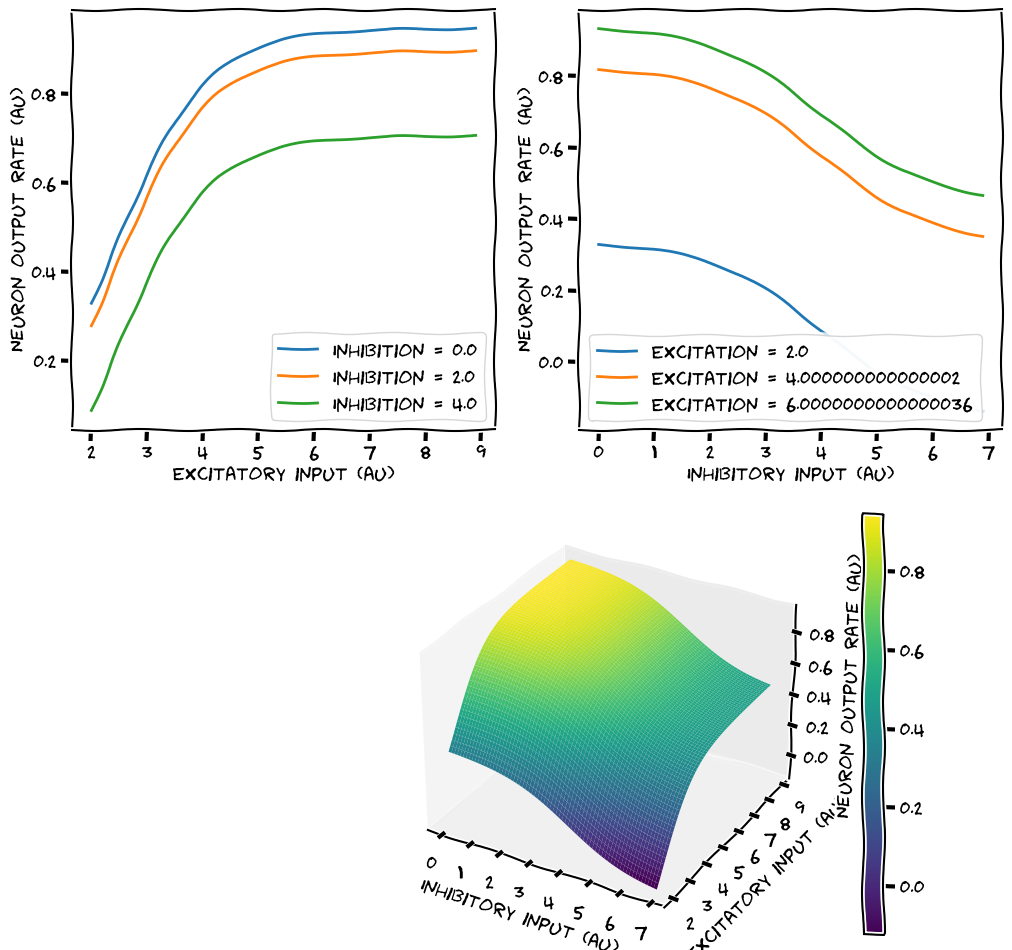

In [ ]:
# @markdown Execute this cell to visualize the neuron firing rate surface


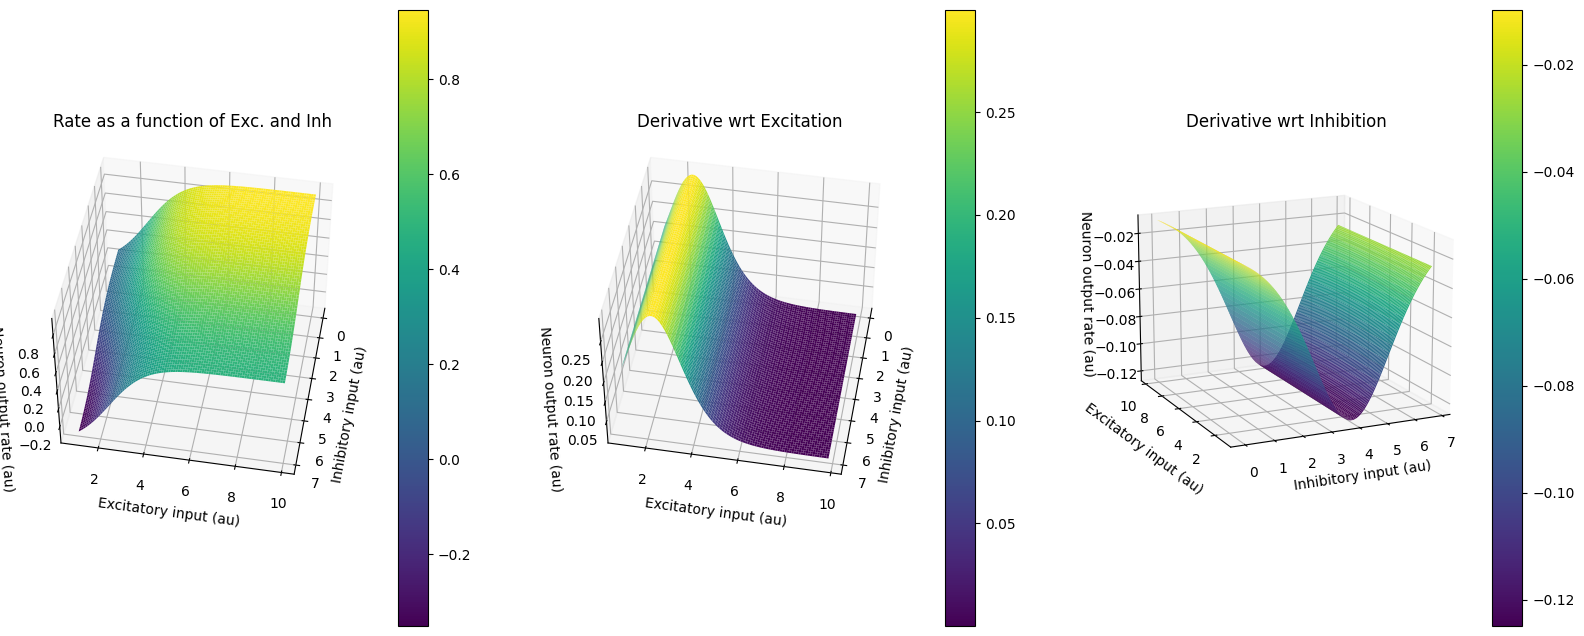

In [ ]:
# @markdown Execute this cell implement our neural transfer function, `plot_2d_neuron_transfer_function`, in respond to excitatory and inhibitory input
def plot_2d_neuron_transfer_function(exc_a, exc_theta, inh_a, inh_theta):
    # Neuron Transfer Function
    step_size = 0.1
    exc_input = np.arange(1,10,step_size)
    inh_input = np.arange(0,7,step_size)

    rate = np.zeros((len(exc_input),len(inh_input)))
    for ii in range(len(exc_input)):
      for jj in range(len(inh_input)):
        rate[ii,jj] = sigmoid_function(exc_input[ii],exc_a,exc_theta) - sigmoid_function(inh_input[jj],inh_a,inh_theta)*0.5

    # Derivative with respect to excitatory input rate
    rate_de = np.zeros((len(exc_input)-1,len(inh_input)))# this will have one row less than the rate matrix
    for ii in range(len(inh_input)):
      rate_de[:,ii] = (rate[1:,ii] - rate[0:-1,ii])/step_size

    # Derivative with respect to inhibitory input rate
    rate_di = np.zeros((len(exc_input),len(inh_input)-1))# this will have one column less than the rate matrix
    for ii in range(len(exc_input)):
      rate_di[ii,:] = (rate[ii,1:] - rate[ii,0:-1])/step_size


    X, Y = np.meshgrid(exc_input, inh_input)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    surf1 = ax1.plot_surface(Y.T, X.T, rate, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('Inhibitory input (au)')
    ax1.set_ylabel('Excitatory input (au)')
    ax1.set_zlabel('Neuron output rate (au)')
    ax1.set_title('Rate as a function of Exc. and Inh');
    ax1.view_init(45, 10)
    fig.colorbar(surf1)

    Xde, Yde = np.meshgrid(exc_input[0:-1], inh_input)
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    surf2 = ax2.plot_surface(Yde.T, Xde.T, rate_de, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax2.set_xlabel('Inhibitory input (au)')
    ax2.set_ylabel('Excitatory input (au)')
    ax2.set_zlabel('Neuron output rate (au)');
    ax2.set_title('Derivative wrt Excitation');
    ax2.view_init(45, 10)
    fig.colorbar(surf2)

    Xdi, Ydi = np.meshgrid(exc_input, inh_input[:-1])
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    surf3 = ax3.plot_surface(Ydi.T, Xdi.T, rate_di, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax3.set_xlabel('Inhibitory input (au)')
    ax3.set_ylabel('Excitatory input (au)')
    ax3.set_zlabel('Neuron output rate (au)');
    ax3.set_title('Derivative wrt Inhibition');
    ax3.view_init(15, -115)
    fig.colorbar(surf3)

plot_2d_neuron_transfer_function(exc_a=1.2, exc_theta=2.4, inh_a=1, inh_theta=4)